

## Importando librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Activation, GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img

import sklearn.metrics as metrics
import scipy


## Cargando dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
directorioBase = '/content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS'

Mounted at /content/drive


##Variables de Datos de Imágenes de entrada

In [3]:
IMAGEN_ALTO = 100
IMAGEN_ANCHO = 100
NUM_COLORES = 3
input_shp = (IMAGEN_ALTO,IMAGEN_ANCHO,3)

## Modelo1

In [4]:
# Modelo 1
# Arquitectura de la Red
modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shp),
    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [5]:
# Compilar el modelo
modelo1.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 2)                 60002     
                                                                 
Total params: 60,002
Trainable params: 60,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
#carga e iteracion carpeta 'train' (960 elementos por subcarpeta)
generadorDatos = ImageDataGenerator(rescale=1. / 255)



iteradorTrain = generadorDatos.flow_from_directory(directory=directorioBase + '/train',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorValidation = generadorDatos.flow_from_directory(directory=directorioBase + '/val',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorTest = generadorDatos.flow_from_directory(directory=directorioBase+'/test',
                                      class_mode='binary',  shuffle=True,
                                      batch_size=96, target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


##Callbacks

In [7]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint1'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [8]:
print("Training model 1 ..")
historial1 = modelo1.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=15,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo1.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 1 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 0.4981 - accuracy: 0.7510 
Epoch 1: val_loss improved from inf to 0.41639, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets
10/10 [==============================] - 274s 28s/step - loss: 0.4981 - accuracy: 0.7510 - val_loss: 0.4164 - val_accuracy: 0.8229
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.8510
Epoch 2: val_loss improved from 0.41639 to 0.35439, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint1/assets
10/10 [==============================] - 89s 9s/step - loss: 0.3501 - accuracy: 0.8510 - val_loss: 0.3544 - val_accuracy: 0.8594
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss:

##Visualización de Datos


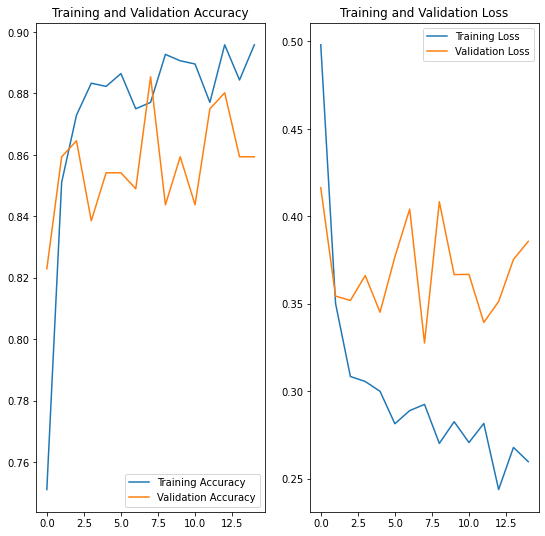

In [9]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial1.history)

# Visualizar los resultados de training y validation
acc_1 = historial1.history['accuracy']
val_acc_1 = historial1.history['val_accuracy']

loss_1 = historial1.history['loss']
val_loss_1 = historial1.history['val_loss']

epochs_range_1 = range(len(acc_1))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_1, acc_1, label='Training Accuracy')
plt.plot(epochs_range_1, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_1, loss_1, label='Training Loss')
plt.plot(epochs_range_1, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [10]:
test_loss_1, test_acc_1 = modelo1.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_1)
print('\nTest loss:', test_loss_1)

# evaluate model
loss_1 = modelo1.evaluate_generator(iteradorTest, steps=24)
print(loss_1)

3/3 - 56s - loss: 0.3255 - accuracy: 0.8667 - 56s/epoch - 19s/step

Test accuracy: 0.8666666746139526

Test loss: 0.3255472183227539


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.3255471885204315, 0.8666666746139526]


##Loss Graph

In [11]:
# Visualize training results
loss_1 = historial1.history['loss']

val_loss_1 = historial1.history['val_loss']


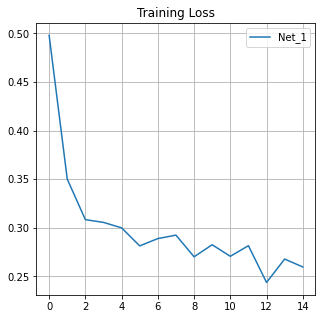

In [12]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_1, loss_1, label='Net_1')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m1.pdf')

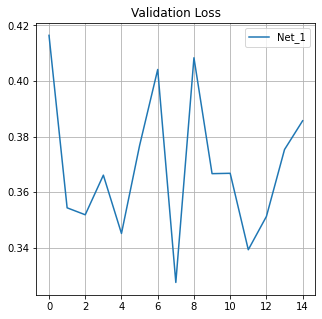

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_1, val_loss_1, label='Net_1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m1.pdf')


##Test Accuracy

In [14]:
print('Test accuracy first model:', test_acc_1)

Test accuracy first model: 0.8666666746139526




## Importando librerías


## Modelo2

In [15]:
# Modelo 2
# Arquitectura de la Red
modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shp),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [16]:
# Compilar el modelo
modelo2.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 400)               12000400  
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 12,040,702
Trainable params: 12,040,702
Non-trainable params: 0
_________________________________________________________________


##Callbacks

In [17]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint2'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [18]:
print("Training model 2 ..")
historial2 = modelo2.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo2.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 2 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.7389 - accuracy: 0.7146
Epoch 1: val_loss improved from inf to 0.42811, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets
10/10 [==============================] - 7s 666ms/step - loss: 0.7389 - accuracy: 0.7146 - val_loss: 0.4281 - val_accuracy: 0.7969
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8615
Epoch 2: val_loss improved from 0.42811 to 0.33904, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint2/assets
10/10 [==============================] - 5s 451ms/step - loss: 0.3320 - accuracy: 0.8615 - val_loss: 0.3390 - val_accuracy: 0.8802
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss

##Visualización de Datos


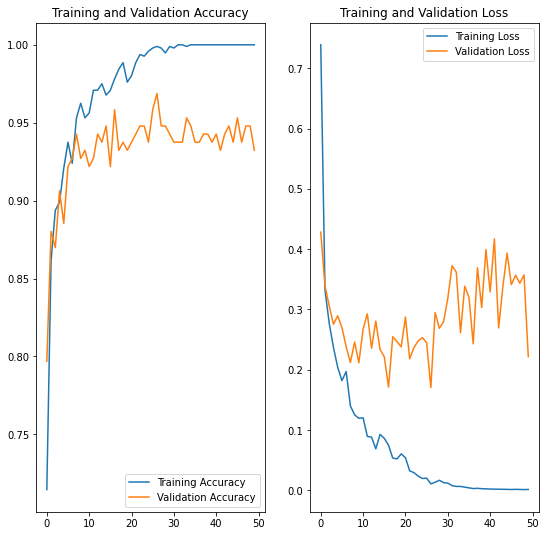

In [19]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial2.history)

# Visualizar los resultados de training y validation
acc_2 = historial2.history['accuracy']
val_acc_2 = historial2.history['val_accuracy']

loss_2 = historial2.history['loss']
val_loss_2 = historial2.history['val_loss']

epochs_range_2 = range(len(acc_2))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_2, acc_2, label='Training Accuracy')
plt.plot(epochs_range_2, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_2, loss_2, label='Training Loss')
plt.plot(epochs_range_2, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [20]:
test_loss_2, test_acc_2 = modelo2.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_2)
print('\nTest loss:', test_loss_2)

# evaluate model
loss_2 = modelo2.evaluate_generator(iteradorTest, steps=24)
print(loss_2)

3/3 - 1s - loss: 0.2701 - accuracy: 0.9333 - 552ms/epoch - 184ms/step

Test accuracy: 0.9333333373069763

Test loss: 0.2700980007648468


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.2700980007648468, 0.9333333373069763]


##Loss Graph

In [21]:
# Visualize training results
loss_2 = historial2.history['loss']

val_loss_2 = historial2.history['val_loss']


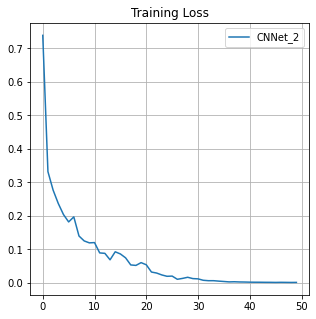

In [22]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_2, loss_2, label='CNNet_2')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m2.pdf')

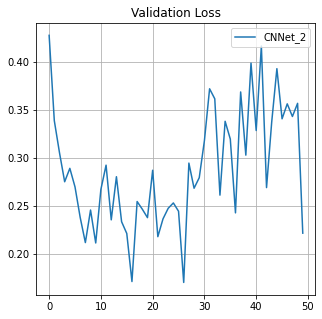

In [23]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_2, val_loss_2, label='CNNet_2')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m2.pdf')


##Test Accuracy

In [24]:
print('Test accuracy second model:', test_acc_2)

Test accuracy second model: 0.9333333373069763


## Modelo3

In [25]:
# Modelo 3
# Arquitectura de la Red
modelo3 = keras.Sequential([
     keras.layers.Conv2D(16, 3, padding='same',
                        strides=(1,1),
                        activation='relu',
                        input_shape=input_shp),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


##Compilación de la Red 

In [26]:
# Compilar el modelo
modelo3.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 flatten_2 (Flatten)         (None, 160000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               20480128  
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 20,480,834
Trainable params: 20,480,834
Non-trainable params: 0
_________________________________________________________________


##Callbacks

In [27]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint3'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [28]:
print("Training model 3 ..")
historial3 = modelo3.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo3.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 3 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.7146
Epoch 1: val_loss improved from inf to 0.50657, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets
10/10 [==============================] - 13s 1s/step - loss: 0.7485 - accuracy: 0.7146 - val_loss: 0.5066 - val_accuracy: 0.7552
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8708
Epoch 2: val_loss improved from 0.50657 to 0.38768, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint3/assets
10/10 [==============================] - 11s 1s/step - loss: 0.3176 - accuracy: 0.8708 - val_loss: 0.3877 - val_accuracy: 0.8229
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.

##Visualización de Datos


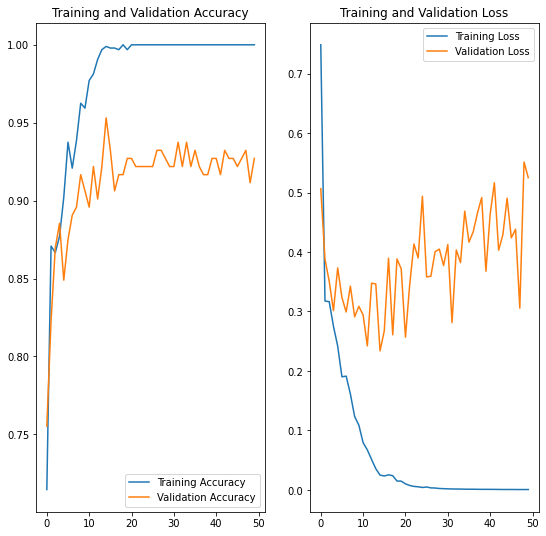

In [29]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial3.history)

# Visualizar los resultados de training y validation
acc_3 = historial3.history['accuracy']
val_acc_3 = historial3.history['val_accuracy']

loss_3 = historial3.history['loss']
val_loss_3 = historial3.history['val_loss']

epochs_range_3 = range(len(acc_3))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_3, acc_3, label='Training Accuracy')
plt.plot(epochs_range_3, val_acc_3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_3, loss_3, label='Training Loss')
plt.plot(epochs_range_3, val_loss_3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [30]:
test_loss_3, test_acc_3 = modelo3.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_3)
print('\nTest loss:', test_loss_3)

# evaluate model
loss_3 = modelo3.evaluate_generator(iteradorTest, steps=24)
print(loss_3)

3/3 - 1s - loss: 0.4109 - accuracy: 0.9333 - 1s/epoch - 465ms/step

Test accuracy: 0.9333333373069763

Test loss: 0.41089531779289246


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.41089534759521484, 0.9333333373069763]


##Loss Graph

In [31]:
# Visualize training results
loss_3 = historial3.history['loss']

val_loss_3 = historial3.history['val_loss']


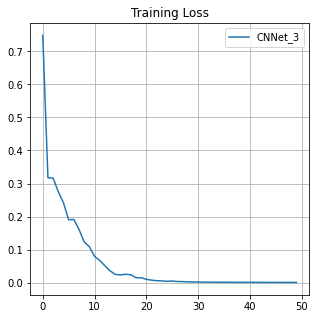

In [32]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_3, loss_3, label='CNNet_3')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m3.pdf')

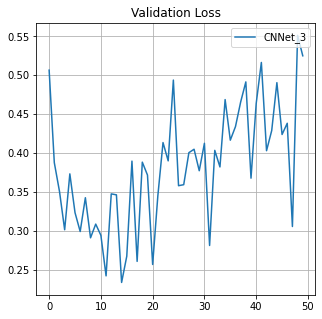

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_3, val_loss_3, label='CNNet_3')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_m3.pdf')


##Test Accuracy

In [34]:
print('Test accuracy third model:', test_acc_3)

Test accuracy third model: 0.9333333373069763


## Cargando dataset

In [35]:
IMAGEN_ALTO = 100
IMAGEN_ANCHO = 100
NUM_COLORES = 3
input_shp = (IMAGEN_ALTO,IMAGEN_ANCHO,3)

## Modelo4

In [36]:
# Modelo 4
# Arquitectura de la Red
# Arquitectura de la Red
modelo4 = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', strides=(1,1),
                        activation='relu', input_shape=input_shp),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.15),

    keras.layers.Conv2D(32, 3, padding='same', strides=(1,1),
                        activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.15),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(2, activation='softmax')
])

##Compilación de la Red 

In [37]:
# Compilar el modelo
modelo4.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

modelo4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 32)       

In [38]:
#carga e iteracion carpeta 'train' (960 elementos por subcarpeta)
generadorDatos = ImageDataGenerator(rescale=1. / 255)



iteradorTrain = generadorDatos.flow_from_directory(directory=directorioBase + '/train',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorValidation = generadorDatos.flow_from_directory(directory=directorioBase + '/val',
                                              class_mode='binary',
                                              batch_size=96,
                                              shuffle=True,
                                              target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


iteradorTest = generadorDatos.flow_from_directory(directory=directorioBase+'/test',
                                      class_mode='binary',  shuffle=True,
                                      batch_size=96, target_size=(IMAGEN_ALTO, IMAGEN_ANCHO))


Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


##Callbacks

In [39]:
## Define your callbacks
directorio_checkpoint=directorioBase + '/checkpoint4'
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=directorio_checkpoint,
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

##Entrenando la Red

In [40]:
print("Training model 4 ..")
historial4 = modelo4.fit_generator(iteradorTrain,
                                  validation_data=iteradorValidation,
                                  steps_per_epoch=960//96,
                                  validation_steps=240//96,
                                  epochs=50,
                                  verbose=True,
                                  callbacks=[Modle_Checkpoint])



print("Modelo entrenado!")
# Matriz de Confusion
Y_pred = modelo4.predict(iteradorTrain, iteradorTrain.samples / 96)
val_preds = np.argmax(Y_pred, axis=1) ##############
val_trues = iteradorTrain.classes
matconf = metrics.confusion_matrix(val_trues, val_preds)
print("Matriz de confusion: ",  matconf)

Training model 4 ..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.4965 - accuracy: 0.7417
Epoch 1: val_loss improved from inf to 0.44891, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets
10/10 [==============================] - 13s 1s/step - loss: 0.4965 - accuracy: 0.7417 - val_loss: 0.4489 - val_accuracy: 0.7969
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.8438
Epoch 2: val_loss improved from 0.44891 to 0.36132, saving model to /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MineriaDatos/PEC3/DATOS/PRUEBAS/checkpoint4/assets
10/10 [==============================] - 10s 1s/step - loss: 0.3623 - accuracy: 0.8438 - val_loss: 0.3613 - val_accuracy: 0.8802
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.

##Visualización de Datos


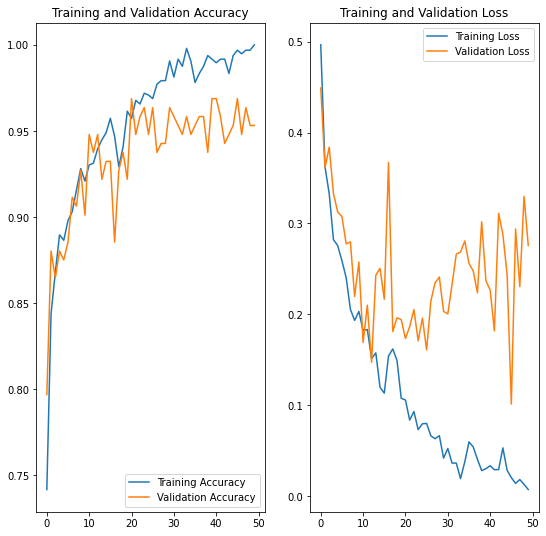

In [41]:

# Convertir la historia en un pandas df
history_df = pd.DataFrame(historial4.history)

# Visualizar los resultados de training y validation
acc_4 = historial4.history['accuracy']
val_acc_4 = historial4.history['val_accuracy']

loss_4 = historial4.history['loss']
val_loss_4 = historial4.history['val_loss']

epochs_range_4 = range(len(acc_4))

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_4, acc_4, label='Training Accuracy')
plt.plot(epochs_range_4, val_acc_4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_4, loss_4, label='Training Loss')
plt.plot(epochs_range_4, val_loss_4, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [42]:
test_loss_4, test_acc_4 = modelo4.evaluate(iteradorTest, verbose=2)

print('\nTest accuracy:', test_acc_4)
print('\nTest loss:', test_loss_4)

# evaluate model
loss_4 = modelo4.evaluate_generator(iteradorTest, steps=24)
print(loss_4)

3/3 - 1s - loss: 0.1473 - accuracy: 0.9542 - 911ms/epoch - 304ms/step

Test accuracy: 0.9541666507720947

Test loss: 0.14731009304523468


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


[0.14731009304523468, 0.9541666507720947]


##Loss Graph

In [43]:
# Visualize training results
loss_4 = historial4.history['loss']

val_loss_4 = historial4.history['val_loss']


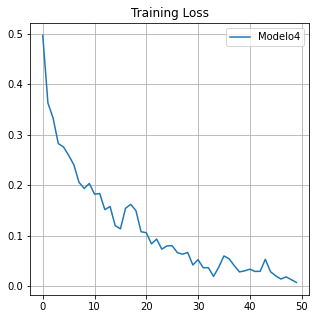

In [44]:

plt.figure(figsize=(5, 5))
plt.plot(epochs_range_4, loss_4, label='Modelo4')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_m4.pdf')

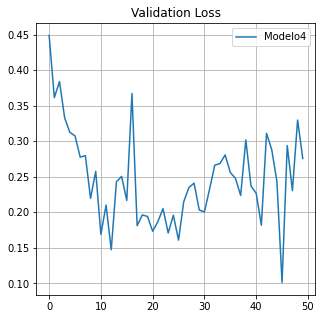

In [45]:
plt.figure(figsize=(5, 5))
plt.plot(epochs_range_4, val_loss_4, label='Modelo4')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_m4.pdf')


##Test Accuracy

In [46]:
print('Test accuracy first model:', test_acc_4)

Test accuracy first model: 0.9541666507720947


# All models together Training accuracy graph

In [47]:
# Visualize training results
acc_1 = historial1.history['accuracy']
acc_2 = historial2.history['accuracy']
acc_3 = historial3.history['accuracy']
acc_4 = historial4.history['accuracy']
#acc_4 = history_4.history['accuracy']
#acc_vgg = history_vgg.history['accuracy']
val_acc_1 = historial1.history['val_accuracy']
val_acc_2 = historial2.history['val_accuracy']
val_acc_3 = historial3.history['val_accuracy']
val_acc_4 = historial4.history['val_accuracy']
#val_acc_4 = history_4.history['val_accuracy']
#val_acc_vgg = history_vgg.history['val_accuracy']

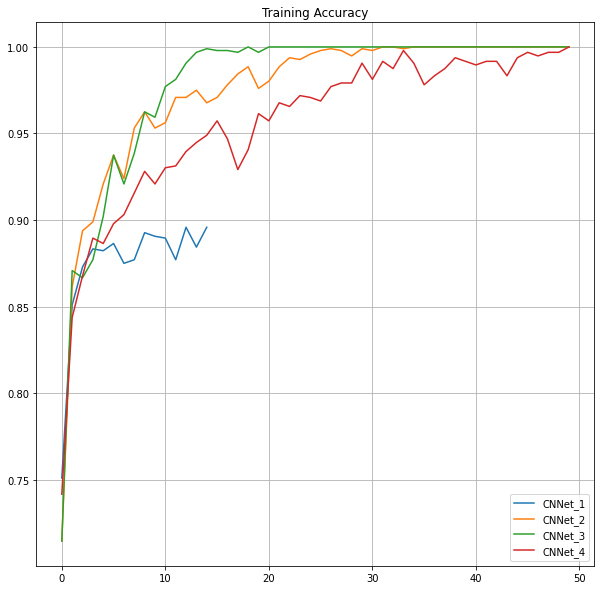

In [48]:
#epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, acc_1, label='CNNet_1')
plt.plot(epochs_range_2, acc_2, label='CNNet_2')
plt.plot(epochs_range_3, acc_3, label='CNNet_3')
plt.plot(epochs_range_4, acc_4, label='CNNet_4')
#plt.plot(epochs_range_3, acc_4, label='Net_4')
#plt.plot(epochs_range, acc_vgg, label='Net_VGG')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.grid()
plt.savefig(directorioBase+'/Train_all.pdf')

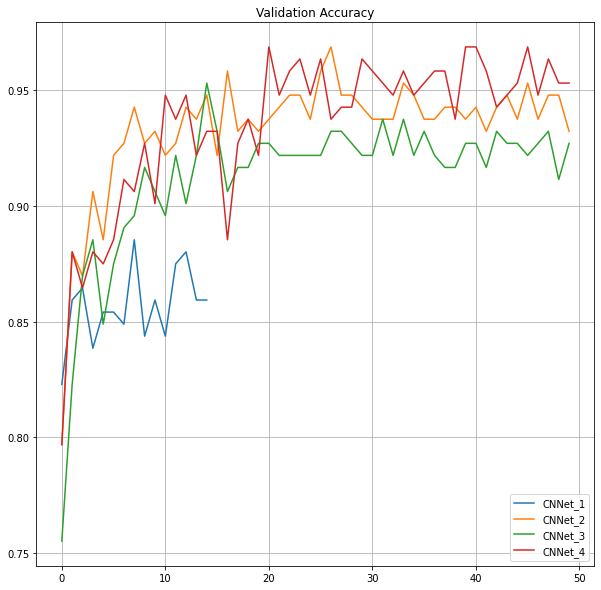

In [49]:
plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, val_acc_1, label='CNNet_1')
plt.plot(epochs_range_2, val_acc_2, label='CNNet_2')
plt.plot(epochs_range_3, val_acc_3, label='CNNet_3')
plt.plot(epochs_range_4, val_acc_4, label='CNNet_4')
#plt.plot(epochs_range_3, val_acc_4, label='Net_4')
#plt.plot(epochs_range, val_acc_vgg, label='Net_VGG')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.grid()
plt.savefig(directorioBase+'/Validation_all.pdf')



# Loss

In [50]:
# Visualize training results
loss_1 = historial1.history['loss']
loss_2 = historial2.history['loss']
loss_3 = historial3.history['loss']
loss_4 = historial4.history['loss']
#loss_4 = history_4.history['loss']
#loss_vgg = history_vgg.history['loss']
val_loss_1 = historial1.history['val_loss']
val_loss2 = historial2.history['val_loss']
val_loss_3 = historial3.history['val_loss']
val_loss_4 = historial4.history['val_loss']
#val_loss_4 = history_4.history['val_loss']
#val_loss_vgg = history_vgg.history['val_loss']


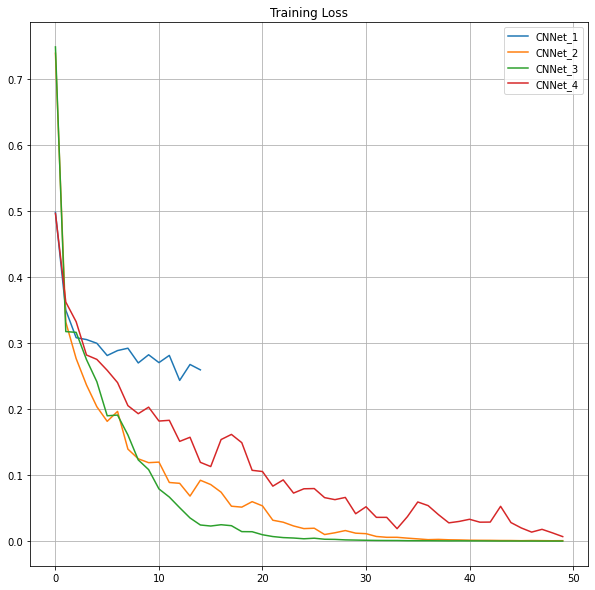

In [51]:
#epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, loss_1, label='CNNet_1')
plt.plot(epochs_range_2, loss_2, label='CNNet_2')
plt.plot(epochs_range_3, loss_3, label='CNNet_3')
plt.plot(epochs_range_4, loss_4, label='CNNet_4')
#plt.plot(epochs_range_3, loss_4, label='Net_4')
#plt.plot(epochs_range, loss_vgg, label='Net_VGG')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.grid()
plt.savefig(directorioBase+'/Train_loss_all.pdf')

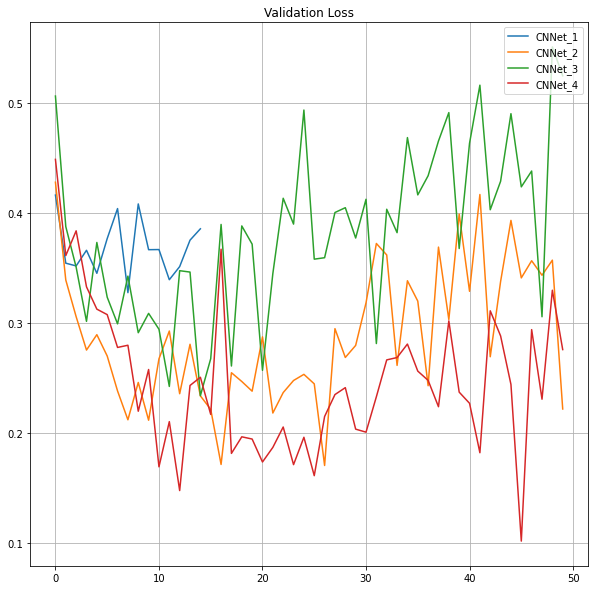

In [52]:
plt.figure(figsize=(10, 10))
plt.plot(epochs_range_1, val_loss_1, label='CNNet_1')
plt.plot(epochs_range_2, val_loss_2, label='CNNet_2')
plt.plot(epochs_range_3, val_loss_3, label='CNNet_3')
plt.plot(epochs_range_4, val_loss_4, label='CNNet_4')
#plt.plot(epochs_range_3, val_loss_4, label='Net_4')
#plt.plot(epochs_range, val_loss_vgg, label='Net_VGG')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.grid()
plt.savefig(directorioBase+'/Validation_loss_all.pdf')



# Accuracy on test set

In [53]:
print('Test accuracy first model:', test_acc_1)
print('Test accuracy second model:', test_acc_2)
print('Test accuracy third model:', test_acc_3)
print('Test accuracy fourth model (mejora del 3):', test_acc_4)
#print('Test accuracy 3 model:', test_acc_4)
#print('Test accuracy vgg model:', test_acc)

Test accuracy first model: 0.8666666746139526
Test accuracy second model: 0.9333333373069763
Test accuracy third model: 0.9333333373069763
Test accuracy fourth model (mejora del 3): 0.9541666507720947
